# Assignment 2: Spam Classification with SVM

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


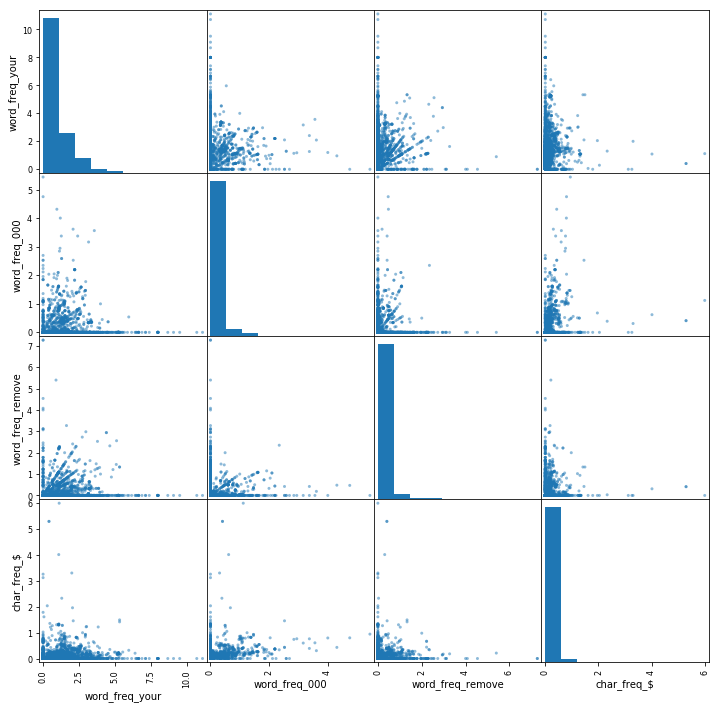

In [1]:
# You might want to use the following packages
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Reading columns csv and doing transpose 
read_csv_columns = pd.read_csv("spambasecolumns.csv")
read_csv_columns = read_csv_columns.drop("Unnamed: 1", axis = 1)
top_row = []
top_row.insert(0, {"word_freq_make": "word_freq_make"})

columns = pd.concat([pd.DataFrame(top_row), read_csv_columns], ignore_index=True)
columns = columns.T
columns = columns.values
columns = columns.tolist()
columns = columns[0]
columns.append("spam")


# Reading data csv and joining columns
data_temp = pd.read_csv("spambase.csv", names=columns, index_col=False)


# Splitting data into training and testing (80% training and 20% testing)
train_set, test_set = train_test_split( data_temp, test_size=0.2, random_state=42 )

 
# Plotting out all relevant correlations between features. 
# Since there are 58 feautures, a scatter matrix would result in 58*58 = 3364 graphs. This 
# is obviously too many graphs, so I decided to scatter plot a small set of the features. 
corr_matrix = data_temp.corr()
corr_matrix["spam"].sort_values( ascending=False )

smaller_feature_set = ["word_freq_your", "word_freq_000", "word_freq_remove", "char_freq_$"]
scatter_data = data_temp[smaller_feature_set]
scatter_matrix( scatter_data, figsize= (12, 12) )


# Separating x trains from y trains
X_train = train_set.drop( "spam", axis=1 )
y_train = train_set[["spam"]].values.ravel()


# Saving pandas dataframe version of X_train for later use
df_xtrain = X_train


# Separating x tests from y tests
X_test = test_set.drop( "spam", axis=1 )
y_test = test_set[["spam"]].values.ravel()


# Standard Scaler pipeline to normalize the x values
pipeline = Pipeline( [ ( "std_scaler", StandardScaler() ) ] )


# Normalizing x training values with pipeline 
X_train = pipeline.fit_transform(X_train)


# Normalizing x testing values with pipeline 
X_test = pipeline.fit_transform(X_test)





- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score:  0.9214676401457385
Precision Score:  0.9156891495601173
Recall Score:  0.8777231201686577
F-1 Score:  0.8963042698241837


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


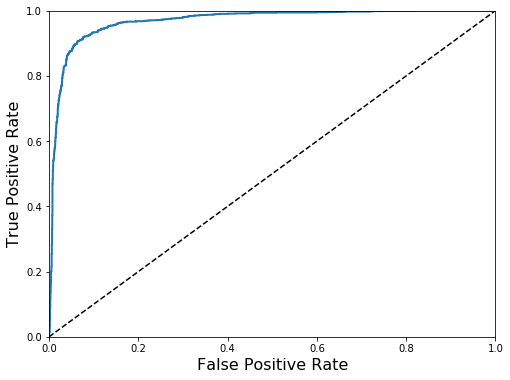

In [2]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000)
svm_clf.fit(X_train, y_train.ravel())

# Testing your svm here
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

y_train_predict = cross_val_predict(svm_clf, X_train, y_train, cv=3)


# 1) Accuracy: 
print("Accuracy Score: ", np.average(cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")))


# 2) Precision: 
print("Precision Score: ", precision_score(y_train, y_train_predict))


# 3) Recall: 
print("Recall Score: ", recall_score(y_train, y_train_predict))


# 4) F-1 Score: 
print("F-1 Score: ", f1_score(y_train, y_train_predict))


# Creating ROC curve: 
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()



- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [3]:
# C = 1       
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000)
svm_clf1.fit(X_train, y_train.ravel())
score1 = np.average(cross_val_score(svm_clf1, X_train, y_train, cv=3, scoring="accuracy"))    
print("The accuracy when C = 1: ", score1)


# C = 10
svm_clf2 = LinearSVC(C=10, loss="hinge", random_state=42, max_iter=10000)
svm_clf2.fit(X_train, y_train.ravel())
score2 = np.average(cross_val_score(svm_clf2, X_train, y_train, cv=3, scoring="accuracy"))  
print("The accuracy when C = 10: ", score2)


# C = 13 
svm_clf3 = LinearSVC(C=13, loss="hinge", random_state=42, max_iter=10000)
svm_clf3.fit(X_train, y_train.ravel())
score3 = np.average(cross_val_score(svm_clf3, X_train, y_train, cv=3, scoring="accuracy"))  
print("The accuracy when C = 13: ", score3)


# C = 20 
svm_clf4 = LinearSVC(C=20, loss="hinge", random_state=42, max_iter=10000)
svm_clf4.fit(X_train, y_train.ravel())
score4 = np.average(cross_val_score(svm_clf4, X_train, y_train, cv=3, scoring="accuracy"))  
print("The accuracy when C = 20: ", score4)


# C = 50
svm_clf5 = LinearSVC(C=50, loss="hinge", random_state=42, max_iter=10000)
svm_clf5.fit(X_train, y_train.ravel())
score5 = np.average(cross_val_score(svm_clf5, X_train, y_train, cv=3, scoring="accuracy"))  
print("The accuracy when C = 50: ", score5)


# I ran a for loop with many different values of C, and calculated the accuracy at every iteration using cross validation. 
# Best value of C seems to be 13 and the accuracy score with that C value is 0.9247316113239563

print()
print("I ran a for loop with many different values of C, and calculated the accuracy at every iteration using cross validation.") 
print("The best value of C seems to be 13 and the accuracy score with that C value is 0.0.9244570675537087")


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy when C = 1:  0.9214676401457385


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy when C = 10:  0.9236422924936191


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy when C = 13:  0.9244570675537087


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy when C = 20:  0.9233699627860347


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy when C = 50:  0.923099404328581

I ran a for loop with many different values of C, and calculated the accuracy at every iteration using cross validation.
The best value of C seems to be 13 and the accuracy score with that C value is 0.0.9244570675537087


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


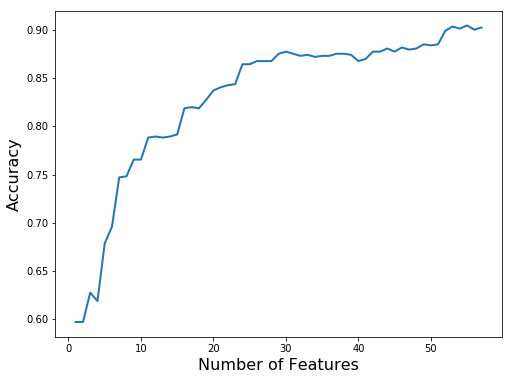

In [4]:
# Getting weight vector w using attribute coef_
w = abs(svm_clf3.coef_[0])
indeces_of_5_highest_weights = w.argsort()[-5:][::-1]


# Setting up graph to plot accuracy on test data vs number of features
plt.figure(figsize=(8, 6))
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Looping on the number of features n = 2 to n = 57
accuracies = []
for i in range(1, 58):  
    
    # Training on n features
    X_train_small = X_train[0:len(X_train), :i]
    svm_clf3.fit(X_train_small, y_train.ravel())
    
    # Testing on the test set to obtain accuracy 
    X_test_small = X_test[0:len(X_train), :i]
    y_pred = svm_clf3.predict(X_test_small)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
# Plotting Accuracy vs Number of Features
plt.plot(np.arange(1, 58), accuracies, linewidth=2, label=None)
plt.show()


# The top 5 features 
top_5 = df_xtrain.columns[indeces_of_5_highest_weights]

# The top 5 features are 'word_freq_george', 'word_freq_cs', 'word_freq_hp', 'word_freq_project', and 'word_freq_3d'.
# The accuracy clearly increased substantially as the number of features increased. There is a flatter portion of the 
# graph, however, at feature number 30 onwards. After a certain point, adding more features did not significantly  
# improve the accuracy. 
# I was quite surprised by the top 5 spam features. Apparently the words george, cs, hp, project and 3d are very 
# correlated witht the Spam. The word George is not as surprising because the database was obtained from emails 
# from a man names George, so it makes sense that a lot of spam emails have the word george in it. 


- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




Best C:  1
Best gamma 0.1


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score:  0.9214676401457385
Precision Score:  0.9298679867986799
Recall Score:  0.791988756148981
F-1 Score:  0.8554079696394686


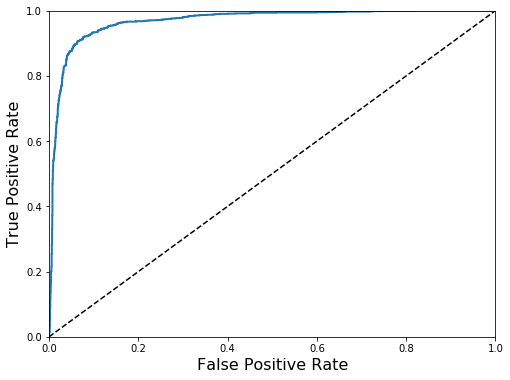

In [5]:
from sklearn.svm import SVC

hyperparams = (0.1, 1), (0.4, 5), (0.6, 8), (0.9, 13)
best_score = 0 
gamma_best = 0
C_best = 0
for gamma, C in hyperparams:
    
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)
    rbf_kernel_svm_clf.fit(X_train, y_train)
    
    
    # Your code to train and find the best value of C and gamma here
    score8 = np.average(cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv=3, scoring="accuracy"))
    if score8 > best_score: 
        best_score = score8
        gamma_best = gamma 
        C_best = C

print("Best C: ", C_best)
print("Best gamma", gamma_best)


rbf_kernel_svm_clf1 = SVC(kernel="rbf", gamma=gamma_best, C=C_best)
y_train_predict1 = cross_val_predict(rbf_kernel_svm_clf1, X_train, y_train, cv=3)


# 1) Accuracy: 
print("Accuracy Score: ", np.average(cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")))


# 2) Precision: 
print("Precision Score: ", precision_score(y_train, y_train_predict1))


# 3) Recall: 
print("Recall Score: ", recall_score(y_train, y_train_predict1))


# 4) F-1 Score: 
print("F-1 Score: ", f1_score(y_train, y_train_predict1))


# Creating ROC curve: 
y_scores1 = cross_val_predict(rbf_kernel_svm_clf1, X_train, y_train, cv=3, method="decision_function")
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_scores1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

# Linear SVM results: 
#       Accuracy Score:  0.9214676401457385
#       Precision Score:  0.9156891495601173
#       Recall Score:  0.8777231201686577
#       F-1 Score:  0.8963042698241837

# Kernelized RBF results: 
#       Accuracy Score:  0.9214676401457385
#       Precision Score:  0.9298679867986799
#       Recall Score:  0.791988756148981
#       F-1 Score:  0.8554079696394686
    
# Clearly, we can see that the results are quite similar on the accuracy and precision, but the recall score and F-1
# score on the Linear SVM were better than the Gaussian RBF scores. The performance of the linear SVM is adecuate to 
# be deployed in practice. The results of all measures (Accuracy, Recall, Precision and F-1 Score) were all pretty 
# good. The linear SVM would make a fine model for SPAM detection. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!